In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## El método de Runge-Kutta de orden cuatro

El método de Runge-Kutta de orden cuatro es un método numérico para resolver ecuaciones diferenciales ordinarias. Se basa en aproximar la solución a 

\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = f(t, y)
\end{equation}

con condiciones iniciales $y(t_0)=y_0$ a:


\begin{equation}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{equation}

donde $h$ es el tamaño del paso y

\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + \frac{h}{2} y_n + \frac{h}{2}k_1) \\
k_3 &= f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2) \\
k_4 &= f(t_n + h, y_n + hk_3)

\end{align*}


El orden de convergencia del método es cuatro, lo que significa que el error local es proporcional a $h^5$ y el error global es proporcional a $h^4$.

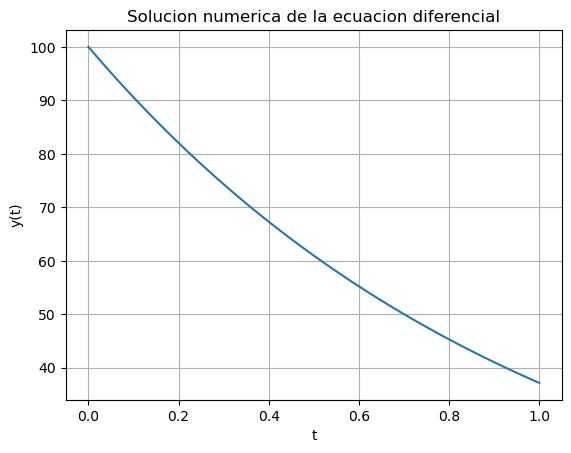

In [107]:
#Ejemplo de clase 

#Definir la funcion (decaiimiento radiactivo)
def funcion(t, y, params):
  a = params[0]
  dydt = -a*y
  return dydt

#Condicion inicial
y0 = 100
t0 = 0
a = 1
tfin = 1  #Tiempo final 
Nt = 100  #Numeros de tiempos

t = np.linspace(t0, tfin, Nt)
params =(a,)
h = 1/Nt


# Solucion numerica con Runge-Kutta
y = np.zeros(Nt)
y[0] = y0
ti=t0
for i in range(0, Nt-1):
  k1 = funcion(ti, y[i], params)
  k2 = funcion(ti + h/2, y[i] + h/2 * k1, params)
  k3 = funcion(ti + h/2, y[i] + h/2*k2  , params)
  k4 = funcion(ti + h  , y[i] + h*k3    , params)
  kmean=(1/6)* (k1 + 2*k2 + 2*k3 + k4)
  y[i+1] = y[i] + kmean*h

  kmean=(1/6)* (k1 + 2*k2 + 2*k3 + k4)
  y[i+1] = y[i] + kmean*h
  ti=ti+h



fig, ax = plt.subplots()
ax.plot(t, y, '-')
ax.set_xlabel('t')
ax.set_ylabel('y(t)')
ax.title.set_text('Solucion numerica de la ecuacion diferencial')
ax.grid()
plt.show()



### Atractor de Lorenz

$$
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z
\end{aligned}
$$


donde $\sigma$ es llamado el número de Prandtl y $\rho$ se llama el número de Rayleigh.

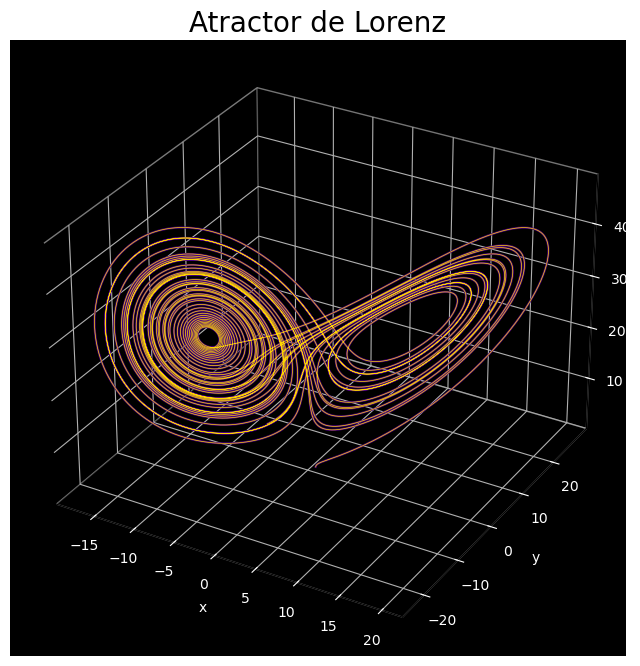

In [108]:
#Condiciones iniciales extraidas de la pagina de wikipedia
sigma = 10
rho = 28
beta = 8./3
posI = [1, 0, 1]
N = 1000
ti = 0
tfin = 30


params=(sigma, rho, beta )

dt = h = 0.001
t = np.arange(0, 40, dt)
ti=t[0]
N=len(t)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0], y[0],z[0] = np.array(posI)  


# Definir la funcion

def fun(t, x,y,z, params):
  sigma = params[0]  
  rho = params[1]  
  beta = params[2]   

  dxdt = sigma*(y-x)
  dydt = x*(rho-z)-y
  dzdt = x*y-beta*z
  return np.array([dxdt, dydt, dzdt])


# Runge-Kutta de orden 4

for i in range(0, N-1):
  k1 = fun(ti,       x[i],            y[i], z[i], params)[0]
  k2 = fun(ti + h/2, x[i] + h/2 * k1, y[i], z[i], params)[0]
  k3 = fun(ti + h/2, x[i] + h/2 * k2, y[i], z[i], params)[0]
  k4 = fun(ti + h  , x[i] + h   * k3, y[i], z[i], params)[0]
  kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)   
  x[i+1] = x[i] + kmean*h
  
  q1 = fun(ti,       x[i],  y[i]           , z[i], params)[1]
  q2 = fun(ti + h/2, x[i],  y[i] + h/2 * q1, z[i], params)[1]
  q3 = fun(ti + h/2, x[i],  y[i] + h/2 * q2, z[i], params)[1]
  q4 = fun(ti + h  , x[i],  y[i] + h   * q3, z[i], params)[1]
  qmean = (1/6) * (q1 + 2*q2 + 2*q3 + q4)   
  y[i+1] = y[i] + qmean*h
  

  c1 = fun(ti,       x[i],  y[i], z[i], params)[2]
  c2 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c1, params)[2]
  c3 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c2, params)[2]
  c4 = fun(ti + h  , x[i],  y[i], z[i] + h   * c3, params)[2]
  cmean = (1/6) * (c1 + 2*c2 + 2*c3 + c4)   
  z[i+1] = z[i] + cmean*h

  ti=ti+dt


# Graficar en 3D 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z, color="indigo")
ax.plot(x, y, z, color="gold", linewidth=0.5)
ax.xaxis.pane.set_facecolor('black') 
ax.yaxis.pane.set_facecolor('black') 
ax.zaxis.pane.set_facecolor('black')
ax.set_facecolor('black')


ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

ax.set_xlabel("x", color='white')
ax.set_ylabel("y", color='white')
ax.set_zlabel("z", color='white')

plt.title("Atractor de Lorenz", fontsize=20)
plt.show()

In [109]:
# @title Rk4 
# Code for solving the Lorenz system using RK4 method (Proporcionado por el profesor) 
def fun(t, r, params):
  sigma = params[0]  
  rho = params[1]  
  beta = params[2]  
  dxdt = sigma*(r[1]-r[0])
  dydt = r[0]*(rho-r[2])-r[1]
  dzdt = r[0]*r[1]-beta*r[2]
  return np.array([dxdt, dydt, dzdt])

# Runge-Kutta de orden 4 vectorizado

def rk4(tini,tfin, h, rini,  params):    
    h = 0.001
    t = np.arange(tini, tfin, h)
    ti=t[0]
    N = len(t)
    r = np.zeros((N,3))
    r[0] = np.array(rini)

    for i in range(0, N-1):
      k1 = fun(ti,r[i], params)
      k2 = fun(ti + h/2, r[i] + h/2 * k1, params)  
      k3 = fun(ti + h/2, r[i] + h/2 * k2, params)  
      k4 = fun(ti + h  , r[i] + h   * k3, params)
      kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)   
      r[i+1] = r[i] + kmean*h  
      ti=ti+h
    return r

def graph(r):
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(projection='3d')
  ax.plot(r[:,0], r[:,1], r[:,2], color="indigo")
  ax.plot(r[:,0], r[:,1], r[:,2], color="gold", linewidth=0.2)
  
  ax.xaxis.pane.set_facecolor('black')
  ax.yaxis.pane.set_facecolor('black')
  ax.zaxis.pane.set_facecolor('black')
  
  ax.set_facecolor('black')
  
  ax.tick_params(axis='x', colors='white')
  ax.tick_params(axis='y', colors='white')
  ax.tick_params(axis='z', colors='white')
  
  ax.set_xlabel("x", color='white')
  ax.set_ylabel("y", color='white')
  ax.set_zlabel("z", color='white')
  plt.title("Atractor de Lorenz", fontsize=20)
  #ax.view_init(0, 0)
  plt.show()

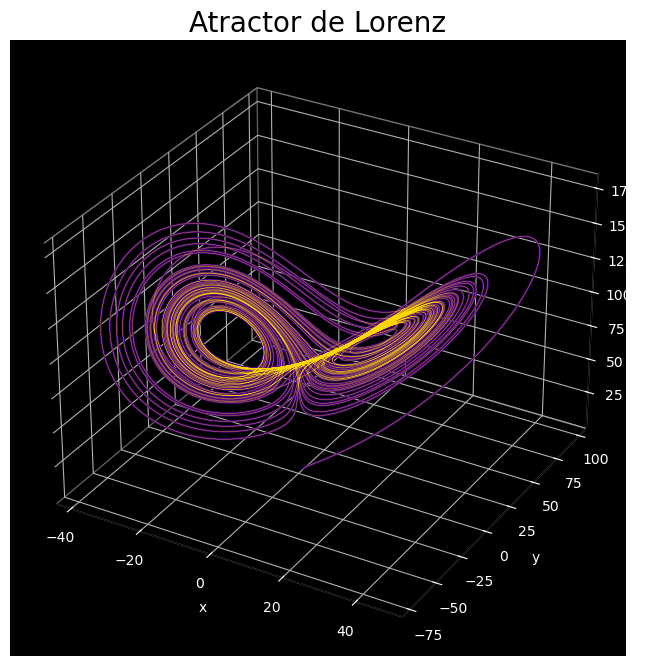

In [110]:
#@ title Condiciones iniciales
sigma = 10
rho = 97
beta = 8./3
posI=np.array([1,1,1])
params=(sigma, rho, beta )

r = rk4(tini = 0, tfin = 40, h = 0.01, 
        rini=posI, params=params)
graph(r)